<a href="https://colab.research.google.com/github/xoyeon/Dacon-Daily-Python-Camp_follow/blob/main/Lv3_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)

# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요


## 한글 글꼴 다운로드
---
해당 셀을 실행하고 [런타임] - [런타임 다시 시작] 후 아래 셀들을 수행하세요.

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,061 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## 데이터 다운로드
---
아래 셀을 실행시켜 데이터를 colab 에 불러옵니다.
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

In [1]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2021-08-24 04:06:17--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2021-08-24 04:06:17--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 108.177.111.100, 108.177.111.101, 108.177.111.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.111.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qkhqlrfkeht4bmo5qba27isr03d5f6hu/1629777975000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download [following]
--2021-08-24 04:06:18--  https://doc-10-10-docs.googleusercontent.com/docs/secur

## 라이브러리 불러오기 및 설정 세팅
---

In [2]:
import pandas as pd
import numpy as np

# 시각화에 필요한 라이브러리를 import
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리를 위한 라이브러리를 import
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# 모델링을 위한 라이브러리를 import
from sklearn.ensemble import RandomForestClassifier

# 교차검증을 위한 라이브러리를 import
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

# 쥬피터노트에서 결과를 출력하도록 설정
%matplotlib inline

# 글꼴 설정
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

# 분석에 문제가 없는 경고 메세지는 숨긴다.
import warnings
warnings.filterwarnings('ignore')

## 👋 실습
---

### EDA

In [3]:
# read_csv() 매서드로 train.csv, test.csv 파일을 df class 로 불러오세요.
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
# info() 매서드로 데이터의 정보를 확인하세요.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [5]:
# shape 어트리뷰트로 행, 열을 파악하세요.
train.shape

(5497, 14)

In [6]:
# head() 매서드로 데이터의 각 컬럼의 정보를 조사하세요.
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [7]:
# isnull() 매서드로  결측치 존재여부를 확인하세요.
train.isnull()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5493,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5494,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5495,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# sum() 매서드로 결측치의 갯수를 출력하세요.
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [9]:
# copy() 매서드로 학습 데이터의 복사본을 생성하세요.
traindata = train.copy()

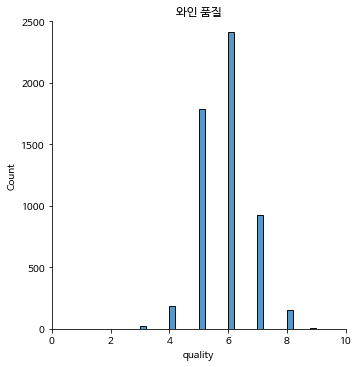

In [10]:
# 타깃 변수(와인품질)의 분포를 시각화합니다.

#1 seaborn 의 displot() 으로 어느 변수를 시각화할지 옵션에 지정해주세요.
sns.displot(traindata['quality'], kde=False, bins=30)
#2 matplot 의 axis() 로 각 축의 최소, 최대 값을 지정해주세요.
plt.axis([0, 10, 0, 2500])
#3 matplot 의 title() 로 그래프의 제목을 지정해주세요.
plt.title('와인 품질')
#4 matplot 의 show() 로 그래프를 출력해주세요.
plt.show()

In [11]:
# x축 지점의 값들로 정할 리스트를 생성합니다.
x_values = [0, 1, 2, 3, 4]

In [12]:
# y축 지점의 값들로 정할 리스트를 생성합니다.
y_values = [0, 1, 4, 9, 16]

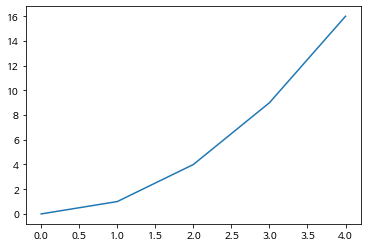

In [13]:
# plot() 매서드를 활용해 그래프를 그린 후 화면에 보여줍니다.
plt.plot(x_values, y_values)
plt.show()

In [14]:
# 변수 분포를 갖는 리스트를 생성합니다.
list = [0,1,2,2,3,3,3,4,4,4,4,5,5,5,5]

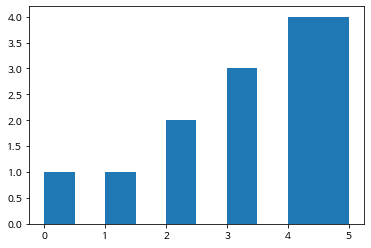

In [15]:
# plot() 매서드를 활용해 그래프를 그린 후 화면에 보여줍니다.
plt.hist(list)
plt.show()

### 전처리

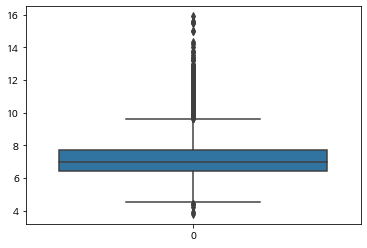

In [16]:
# boxplot() 매서드로 'fixed acidity' 피쳐의 이상치를 확인하는 코드를 아래에 작성하세요.
sns.boxplot(data=train['fixed acidity'])

In [17]:
# "fixed acidity"가 25%인 값을 "quantile_25" 라는 변수에 만들어 주세요.
quantile_25 = np.quantile(train['fixed acidity'], 0.25)
quantile_25

6.4

In [18]:
# "fixed acidity"가 75%인 값을 "quantile_75" 라는 변수에 만들어 주세요.
quantile_75 = np.quantile(train['fixed acidity'],0.75)
quantile_75

7.7

In [19]:
# quantile_75와 quantile_25의 차이를 "IQR"이라는 변수에 만들어 주세요.
IQR = quantile_75 - quantile_25
IQR

1.2999999999999998

In [20]:
# quantile_25보다 1.5 * IQR 작은 값을 "minimum"이라는 변수에 만들어 주세요.
minimum = quantile_25 - 1.5 * IQR
minimum

4.450000000000001

In [21]:
# quantile_75보다 1.5 * IQR 큰 값을 "maximum"이라는 변수에 만들어 주세요.
maximum = quantile_75 + 1.5 * IQR
maximum

9.65

In [22]:
# "fixed acidity"가 minimum보다 크고, maximum보다 작은 값들만 "train2"에 저장해 주세요.
train2 = train[(minimum <= train['fixed acidity']) & (train['fixed acidity'] <= maximum)]

In [23]:
# train2.shape를 통해서, 총 몇개의 행이 되었는지 확인해보세요.
train2.shape

(5203, 14)

In [24]:
# 몇개의 이상치가 있는지도 계산해보세요.
train.shape[0] - train2.shape[0]

294

In [25]:
# describe를 통해 "fixed acidity"의 데이터의 분포가 어떻게 생겼는지 짐작해보세요.
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


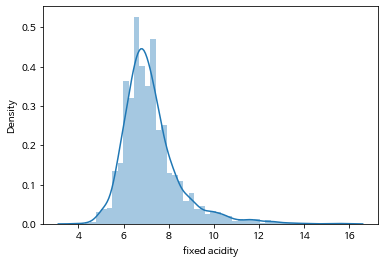

In [26]:
# seaborn의 displot을 통해 "fixed acidity"의 distplot을 그려보세요.
sns.distplot(train['fixed acidity'])

In [27]:
# MinMaxScaler를 "scaler"라는 변수에 지정해주세요.
scaler = MinMaxScaler()

In [28]:
# "scaler"를 학습시켜주세요.
scaler.fit(train[['fixed acidity']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [29]:
# "scaler"를 통해 train과 test의 "fixed acidity"를 바꾸어 "Scaled fixed acidity"라는 column에 저장해주세요.
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])

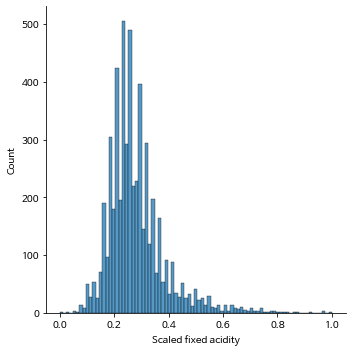

In [30]:
# seaborn의 displot을 통해 "Scaled fixed acidity"의 distplot을 그려보세요.
sns.displot(train['Scaled fixed acidity'])

In [31]:
# "OneHotEncoder"를 "encoder"라는 변수에 저장해보세요.
encoder = OneHotEncoder()

In [32]:
# "encoder"를 사용해 train의 "type" 피쳐를 학습시켜보세요.
encoder.fit(train[['type']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [33]:
# "encoder"를 사용해 train의 "type"피쳐를 변환해 "onehot"이라는 변수에, test의 "type"피쳐를 변환해 "onehot2"라는 변수에 저장해보세요.
onehot = encoder.transform(train[['type']])
onehot2 = encoder.transform(test[['type']])

In [34]:
# "onehot", "onehot2" 라는 변수를 array 형태로 변환해 보세요.
onehot = onehot.toarray()
onehot2 = onehot2.toarray()

In [35]:
# "onehot","onethot2"라는 변수를 DataFrame 형태로 변환해 보세요. 
onehot = pd.DataFrame(onehot)
onehot2 = pd.DataFrame(onehot2)

In [36]:
# encoder의 "get_feature_names()"를 사용해 column 이름을 바꿔보세요.
onehot.columns = encoder.get_feature_names()
onehot2.columns = encoder.get_feature_names()

In [37]:
# onehot, onehot2를 원본데이터인 train,test에 병합시켜보세요.
onehot = pd.concat([train, onehot], axis = 1)
onehot2 = pd.concat([train, onehot2], axis=1)

In [38]:
# train과 test의 "type" 변수를 제거해주세요.
train = train.drop(columns = ['type'])
test = test.drop(columns=['type'])

### 모델링

In [39]:
# 랜덤포레스트 분류 모형을 불러오세요.
from sklearn.ensemble import RandomForestClassifier

In [40]:
# 랜덤포레스트 분류 모형을 "random_classifier"라는 변수에 저장하세요.
random_classifier = RandomForestClassifier()
random_classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
# "X"라는 변수에 train의 "quality" 피쳐를 제거하고 저장하세요.
X = train.drop(columns = ['quality'])

In [42]:
# "y"라는 변수에 정답인 train의 "quality" 피쳐를 저장하세요.
y = train['quality']

In [43]:
# "random_classifier"를 X와 y를 이용해 학습시켜보세요.
random_classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
# sklearn에 model_selection 부분 속 KFold를 불러와보세요.
from sklearn.model_selection import KFold

In [45]:
# KFold에 n_splits = 5, shuffle = True, random_state = 0이라는 인자를 추가해 "kf"라는 변수에 저장해보세요.
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [46]:
# 반복문을 통해서 1번부터 5번까지의 데이터에 접근해보세요.
for train_idx, valid_idx in kf.split(train):
  
  train_data = train.iloc[train_idx]
  valid_data = train.iloc[valid_idx]

In [47]:
# "X"라는 변수에 train의 "index"와 "quality"를 제외하고 지정해 주세요.
# "y"라는 변수에는 "quality"를 지정해 주세요.
X = train.drop(columns = ['index','quality'])
y = train['quality']

In [48]:
# "kf"라는 변수에 KFold를 지정해 줍시다.
# n_splits는 5, shuffle은 True, random_state는 0으로 설정해주세요.
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [49]:
# "model"이라는 변수에 RandomForestClassifier를 지정해 줍시다.
# valid_scores라는 빈 리스트를 하나 만들어줍시다.
# test_predictions라는 빈 리스트를 하나 만들어 줍시다.
model = RandomForestClassifier(random_state = 0)

valid_scores = []
test_predictions = []

In [50]:
# 지난 시간에 다루었던 kf.split()을 활용해, 반복문으로 X_tr, y_tr, X_val, y_val을 설정해봅시다.
for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

In [51]:
# 앞의 문제에 이어서 반복문 속에서 model.fit(X_tr, y_tr)을 활용해 모델을 학습해봅시다.
for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)

In [52]:
# 앞의 문제에 이어서 반복문 속에서 "valid_prediction"이라는 변수에 model.predict(X_val)의 결과를 저장해 봅시다. 
for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)
  
  valid_prediction = model.predict(X_val)

In [53]:
# 앞의 문제에 이어서 반복문 속에서 accuracy_score를 이용해, 모델이 어느정도의 예측 성능이 나올지 확인해봅시다.
# 그리고 "valid_prediction"의 점수를 scores에 저장 해봅시다. 
# 반복문에서 빠져나온 후에 np.mean()을 활용해 평균 점수를 예측해봅시다.

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)
  
  valid_prediction = model.predict(X_val)
  score = accuracy_score(y_val, valid_prediction)
  valid_scores.append(score)
  print(score)
print('평균 점수 : ', np.mean(valid_scores))

0.6854545454545454
0.68
0.654231119199272
0.6624203821656051
0.6642402183803457
평균 점수 :  0.6692692530399535


In [54]:
# 이제 어느정도의 성능이 나올지 알게 되었으니, 반복문 속에서 test를 예측해 "test_prediction"이라는 변수에 지정해봅시다.
# test_prediction을 지정했다면, "test_precitions"라는 빈 리스트에 넣어줍시다.

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)

  test_prediction = model.predict(test.drop(columns = ['index']))
  test_predictions.append(test_prediction)

In [55]:
# 이제 결과 값을 만들어 보겠습니다.
# "test_precitions"를 Data Frame으로 만들어주세요.
test_predictions = pd.DataFrame(test_predictions)
test_predictions

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,6,6,6,5,6,6,5,6,6,7,6,5,7,6,6,5,6,7,5,5,6,6,5,6,6,5,5,5,5,5,7,6,5,5,6,6,5,5,6,6,...,5,5,5,5,6,5,5,5,5,7,6,6,7,6,6,5,6,6,6,6,6,5,6,5,5,6,6,5,5,5,6,6,6,5,7,6,6,5,6,6
1,6,6,6,5,6,6,6,6,6,7,6,6,7,6,6,5,6,6,6,5,6,6,5,7,6,5,5,5,5,5,7,6,5,6,5,6,5,5,6,6,...,5,5,5,5,6,5,5,5,5,7,6,7,7,7,6,5,7,6,6,6,5,5,6,5,5,6,6,5,5,5,6,6,6,6,7,6,5,5,6,6
2,5,6,6,5,6,6,6,6,6,7,6,6,7,6,6,5,6,6,6,5,6,6,5,7,6,5,5,5,5,5,6,6,5,5,6,6,5,5,6,6,...,5,5,5,5,6,5,5,6,5,7,6,6,7,7,6,5,7,6,6,6,5,5,6,5,5,6,6,5,5,5,6,6,6,6,7,5,6,5,6,6
3,6,6,6,6,6,6,5,6,6,7,6,6,7,6,6,5,6,6,6,5,6,6,5,7,6,5,5,5,6,5,7,6,5,5,6,6,5,5,6,6,...,5,5,5,5,6,5,5,6,5,7,6,6,7,7,6,5,7,6,6,6,5,5,6,5,5,6,6,5,6,5,6,6,6,6,7,6,6,5,6,6
4,5,6,6,5,6,6,6,6,6,7,6,6,7,6,6,5,6,6,6,5,6,6,5,7,6,5,5,5,5,5,7,6,5,6,5,6,5,5,6,5,...,5,5,5,5,6,5,5,5,5,7,6,6,7,7,6,5,7,6,6,6,6,6,6,5,5,6,6,5,5,5,6,6,6,6,7,6,6,5,6,7


In [56]:
# DF.mode()를 활용해 열별 최빈값을 확인하고, "test_prediction"이라는 변수에 지정해봅시다.
# "test_prediction"의 첫 행을 최종 결과값으로 사용합시다.
test_prediction = test_predictions.mode()
test_prediction = test_predictions.values[0]
test_prediction

array([6, 6, 6, 5, 6, 6, 5, 6, 6, 7, 6, 5, 7, 6, 6, 5, 6, 7, 5, 5, 6, 6,
       5, 6, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 6, 4, 6, 5, 5, 6, 4, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 7, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 7, 6, 6, 5, 6, 7, 5, 5, 6, 6, 6, 7, 5, 5,
       4, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 7, 6, 6, 8, 6, 5,
       6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 7, 5,
       5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 7,
       6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 5, 6, 6, 7, 6, 6,
       6, 6, 7, 6, 5, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 7, 6, 7, 6, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 5, 6, 6, 6, 5, 7, 7,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 8, 5, 5, 7, 7,

In [57]:
# data의 sample_submission 파일을 불러와 "quality"라는 변수에 "test_precition"을 저장해줍시다.
# 그 이후에는, "data/submission_KFOLD.csv"에 저장하고, 제출해봅시다.
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['quality'] = test_prediction

sample_submission.to_csv('data/submission_KFOLD.csv', index=False)

### 튜닝

***### 조금 더 공부가 필요한 부분***

In [58]:
# bayesian-optimization을 설치해보세요.
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=f6b1e45459f821a9ac56ef013eb6a0f741c0c4287dc0479350a8744b31c1640f
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [59]:
# bayes_opt 패키지에서 BayesianOptimization을 불러와보세요.
from bayes_opt import BayesianOptimization

In [60]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요
X = train.drop(columns = ['index', 'quality'])
y = train['quality']

In [61]:
# 랜덤포레스트의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요
## Key는 랜덤포레스트의 hyperparameter이름이고, value는 탐색할 범위 입니다.
rf_parameter_bounds = {'max_depth' : (1,3), # 나무의 깊이
                      'n_estimators' : (30,100)
                      }

In [62]:
# 함수를 만들어주겠습니다.
# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환

def rf_bo(max_depth, n_estimators):
  rf_params = {
              'max_depth' : int(round(max_depth)),
               'n_estimators' : int(round(n_estimators)),      
              }
  rf = RandomForestClassifier(**rf_params)

  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )

  rf.fit(X_train,y_train)
  score = accuracy_score(y_valid, rf.predict(X_valid))
  return score

In [63]:
# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.
# "BO_rf"라는 변수에 Bayesian Optmization을 저장해보세요
BO_rf = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds,random_state = 0)

In [64]:
# Bayesian Optimization을 실행해보세요
BO_rf.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.5173   |  2.098    |  80.06    |
|  2        |  0.4945   |  2.206    |  68.14    |
|  3        |  0.53     |  1.847    |  75.21    |
|  4        |  0.5136   |  1.875    |  92.42    |
|  5        |  0.5064   |  2.927    |  56.84    |
|  6        |  0.4655   |  1.0      |  30.0     |
|  7        |  0.5182   |  2.038    |  84.04    |
|  8        |  0.4727   |  1.0      |  43.98    |
|  9        |  0.4818   |  1.004    |  99.92    |
|  10       |  0.4736   |  1.0      |  57.67    |


In [65]:
# 하이퍼파라미터의 결과값을 불러와 "max_params"라는 변수에 저장해보세요
max_params = BO_rf.max['params']
max_params['max_depth'] = int(max_params['max_depth'])
max_params['n_estimators'] = int(max_params['n_estimators'])
print(max_params)

{'max_depth': 1, 'n_estimators': 75}


In [66]:
# Bayesian Optimization의 결과를 "BO_tuend_rf"라는 변수에 저장해보세요
BO_tuend_rf = RandomForestClassifier(**max_params)

## 정답
---

### EDA

In [67]:
# read_csv() 매서드로 train.csv , test.csv파일을 df class 로 불러오세요.
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [68]:
# info() 매서드로 데이터의 정보를 확인하세요.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [69]:
# shape 어트리뷰트로 행, 열을 파악하세요.
train.shape

(5497, 14)

In [70]:
# head() 매서드로 데이터의 각 컬럼의 정보를 조사하세요.
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [71]:
# isnull() 매서드로  결측치 존재여부를 확인하세요.
train.isnull()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5493,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5494,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5495,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
# sum() 매서드로 결측치의 갯수를 출력하세요.
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [73]:
# copy() 매서드로 학습 데이터의 복사본을 생성하세요.
traindata = train.copy()

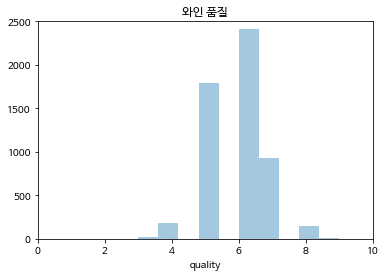

In [74]:
# 타깃 변수(와인 품질) 분포 시각화
sns.distplot(traindata['quality'], kde=False, bins=10)
plt.axis([0, 10, 0, 2500]) # [x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값]
plt.title("와인 품질") # 그래프 제목 지정
plt.show() # 그래프 그리기

In [75]:
# x축 지점의 값들로 정할 리스트를 생성합니다.
x_values = [0, 1, 2, 3, 4]

In [76]:
# y축 지점의 값들
y_values = [0, 1, 4, 9, 16]

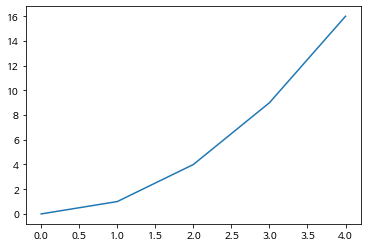

In [77]:
# line 그래프를 그린 후 화면에 보여줍니다.
plt.plot(x_values, y_values)
plt.show()

In [78]:
# 변수 분포를 갖는 리스트를 생성합니다.
a = [1,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,7]

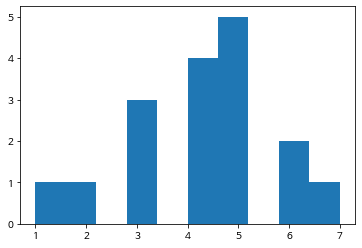

In [79]:
# line 그래프를 그린 후 화면에 보여줍니다.
plt.hist(a)
plt.show()

### 전처리

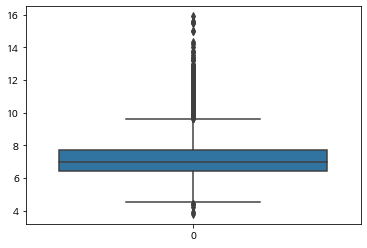

In [80]:
# boxplot() 매서드로 'fixed acidity' 피쳐의 이상치를 확인하는 코드를 아래에 작성하세요.

sns.boxplot(data=train['fixed acidity'])

In [81]:
# "fixed acidity"가 25%인 값을 "quantile_25" 라는 변수에 만들어 주세요

quantile_25 = np.quantile(train['fixed acidity'], 0.25)

In [82]:
# "fixed acidity"가 75%인 값을 "quantile_75" 라는 변수에 만들어 주세요

quantile_75 = np.quantile(train['fixed acidity'],0.75)

In [83]:
# quantile_75와 quantile_25의 차이를 "IQR"이라는 변수에 만들어 주세요

IQR = quantile_75 - quantile_25

In [84]:
# quantile_25보다 1.5 * IQR 작은 값을 "minimum"이라는 변수에 만들어 주세요

minimum = quantile_25 - 1.5 * IQR

In [85]:
# quantile_75보다 1.5 * IQR 큰 값을 "maximum"이라는 변수에 만들어 주세요

maximum = quantile_75 + 1.5 * IQR

In [86]:
# "fixed acidity"가 minimum보다 크고, maximum보다 작은 값들만 "train2"에 저장해 주세요

train2 = train[(minimum <= train['fixed acidity']) & (train['fixed acidity'] <= maximum)]

In [87]:
# train2.shape를 통해서, 총 몇개의 행이 되었는지 확인해보세요.

train2.shape

(5203, 14)

In [88]:
# 몇개의 이상치가 있는지도 계산해보세요.
# 294개의 이상치를 발견해 제거했습니다.

train.shape[0] - train2.shape[0]

294

In [89]:
# describe를 통해 "fixed acidity"의 데이터의 분포가 어떻게 생겼는지 짐작해보세요
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


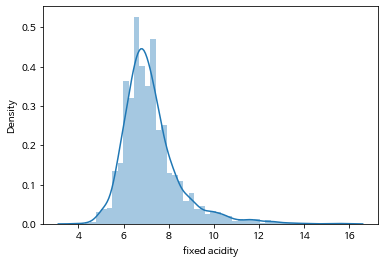

In [90]:
# seaborn의 displot을 통해 "fixed acidity"의 distplot을 그려보세요.
sns.distplot(train['fixed acidity'])

In [91]:
# MinMaxScaler를 "scaler"라는 변수에 지정해주세요.
scaler = MinMaxScaler()

In [92]:
# "scaler"를 학습시켜주세요.
scaler.fit(train[['fixed acidity']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [93]:
# "scaler"를 통해 train과 test의 "fixed acidity"를 바꾸어 "Scaled fixed acidity"라는 column에 저장해주세요.
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])

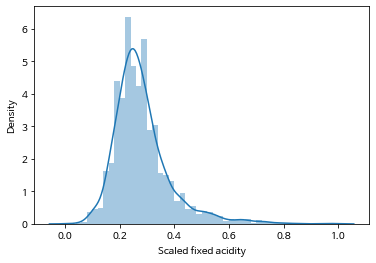

In [94]:
# seaborn의 displot을 통해 "Scaled fixed acidity"의 distplot을 그려보세요

sns.distplot(train['Scaled fixed acidity'])

In [95]:
# "OneHotEncoder"를 "encoder"라는 변수에 저장해보세요.
encoder = OneHotEncoder()

In [96]:
# "encoder"를 사용해 train의 "type" 피쳐를 학습시켜보세요.
encoder.fit(train[['type']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [97]:
# "encoder"를 사용해 train의 "type"피쳐를 변환해 "onehot"이라는 변수에, test의 "type"피쳐를 변환해 "onehot2"라는 변수에 저장해보세요.
onehot = encoder.transform(train[['type']])
onehot2 = encoder.transform(test[['type']])
onehot

<5497x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5497 stored elements in Compressed Sparse Row format>

In [98]:
# "onehot", "onehot2" 라는 변수를 array 형태로 변환해 보세요.
onehot = onehot.toarray()
onehot2 = onehot2.toarray()
onehot

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [99]:
# "onehot","onethot2"라는 변수를 DataFrame 형태로 변환해 보세요
onehot = pd.DataFrame(onehot)
onehot2 = pd.DataFrame(onehot2)
onehot.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [100]:
# encoder의 "get_feature_names()"를 사용해 column 이름을 바꿔보세요
onehot.columns = encoder.get_feature_names()
onehot2.columns = encoder.get_feature_names()
onehot.head()

,x0_red,x0_white
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [101]:
# onehot, onehot2를 원본데이터인 train,test에 병합시켜보세요.
onehot = pd.concat([train, onehot], axis = 1)
onehot.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,Scaled fixed acidity,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,0.330579,0.0,1.0


In [102]:
# train과 test의 "type" 변수를 제거해주세요.
train = train.drop(columns = ['type'])
test = test.drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579


In [103]:
### 코드를 더 단순화 시켜볼게요!
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
encoder = OneHotEncoder()
onehot = pd.DataFrame(encoder.fit_transform(train[['type']]).toarray(), columns = encoder.get_feature_names())
onethot2 = pd.DataFrame(encoder.fit_transform(test[['type']]).toarray(), columns = encoder.get_feature_names())
train = pd.concat([train,onehot], axis = 1).drop(columns = ['type'])
test = pd.concat([test, onehot2], axis = 1).drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.0,1.0


### 모델링

In [104]:
# 랜덤포레스트 분류 모형을 불러오세요.
from sklearn.ensemble import RandomForestClassifier

In [105]:
# 랜덤포레스트 분류 모형을 "random_forest"라는 변수에 저장하세요.
random_forest = RandomForestClassifier()
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
# "X"라는 변수에 train의 "quality" 피쳐를 제거하고 저장하세요.
X = train.drop(columns = ['quality'])

In [107]:
# "y"라는 변수에 정답인 train의 "quality" 피쳐를 저장하세요. 
y = train['quality']

In [108]:
# "random_classifier"를 X와 y를 이용해 학습시켜보세요.
random_forest.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
# sklearn에 model_selection 부분 속 KFold를 불러와보세요.
from sklearn.model_selection import KFold

In [110]:
# KFold에 n_splits = 5, shuffle = True, random_state = 0이라는 인자를 추가해 "kf"라는 변수에 저장해보세요.
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [111]:
# 반복문을 통해서 1번부터 5번까지의 데이터에 접근해보세요.

for train_idx, valid_idx in kf.split(train) :
  train_data = train.iloc[train_idx]
  valid_data = train.iloc[valid_idx]

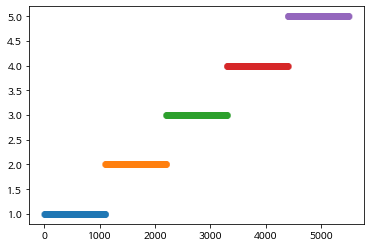

In [112]:
# 이 코드는 순서대로 이해하려 해보세요 :)

import matplotlib.pyplot as plt


kf = KFold(n_splits = 5, shuffle = False, random_state = 0)
train_idx_store = []
valid_idx_store = []

i = 1
for train_idx, valid_idx in kf.split(train) :
  plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha = 0.1)
  i += 1
plt.show()


## 아래의 이미지는 shuffle = False로 했을 때, 데이터가 겹치지 않게 순서대로 쪼개지는 것을 볼 수 있습니다.

In [113]:
# "X"라는 변수에 train의 "index"와 "quality"를 제외하고 지정해 주세요
# "y"라는 변수에는 "quality"를 지정해 주세요

X = train.drop(columns = ['index','quality'])
y = train['quality']

In [114]:
# "kf"라는 변수에 KFold를 지정해 줍시다.
# n_splits는 5, shuffle은 True, random_state는 0으로 설정해주세요

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [115]:
# "model"이라는 변수에 RandomForestClassifier를 지정해 줍시다.
# valid_scores라는 빈 리스트를 하나 만들어줍시다.
# test_predictions라는 빈 리스트를 하나 만들어 줍시다.

model = RandomForestClassifier(random_state = 0)
valid_scores = []
test_predictions = []

In [116]:
# 지난 시간에 다루었던 kf.split()을 활용해, 반복문으로 X_tr, y_tr, X_val, y_val을 설정해봅시다.

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

In [117]:
# 앞의 문제에 이어서 반복문 속에서 model.fit(X_tr, y_tr)을 활용해 모델을 학습해봅시다

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)

In [118]:
# 앞의 문제에 이어서 반복문 속에서 "valid_prediction"이라는 변수에 model.predict(X_val)의 결과를 저장해 봅시다. 

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)
  
  valid_prediction = model.predict(X_val)

In [119]:
# 앞의 문제에 이어서 반복문 속에서 accuracy_score를 이용해, 모델이 어느정도의 예측 성능이 나올지 확인해봅시다.
# 그리고 "valid_prediction"의 점수를 scores에 저장 해봅시다. 
# 반복문에서 빠져나온 후에 np.mean()을 활용해 평균 점수를 예측해봅시다.

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)
  
  valid_prediction = model.predict(X_val)
  score = accuracy_score(y_val, valid_prediction)
  valid_scores.append(score)
  print(score)
print('평균 점수 : ', np.mean(valid_scores))

0.6918181818181818
0.6827272727272727
0.6606005459508644
0.6651501364877161
0.6806187443130118
평균 점수 :  0.6761829762594094


In [120]:
# 이제 어느정도의 성능이 나올지 알게 되었으니, 반복문 속에서 test를 예측해 "test_prediction"이라는 변수에 지정해봅시다.
# test_prediction을 지정했다면, "test_precitions"라는 빈 리스트에 넣어줍시다.

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)

  test_prediction = model.predict(test.drop(columns = ['index']))
  test_predictions.append(test_prediction)

In [121]:
# 이제 결과 값을 만들어 보겠습니다.
# "test_precitions"를 Data Frame으로 만들어주세요.

test_predictions = pd.DataFrame(test_predictions)
test_predictions

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,6,5,6,5,6,6,5,6,6,7,6,5,7,6,5,5,6,7,5,5,6,6,5,7,6,5,5,5,5,5,7,6,5,5,6,6,5,5,6,6,...,5,5,5,5,6,5,5,6,5,7,6,6,7,7,6,5,6,6,6,6,6,5,6,5,5,6,6,5,5,5,6,6,6,5,7,6,6,5,6,6
1,5,6,6,5,6,6,6,6,6,7,6,6,7,6,6,5,6,6,6,5,6,6,5,7,6,5,5,5,5,5,7,6,5,6,5,6,5,5,6,6,...,5,6,5,5,6,5,5,5,5,7,6,6,7,6,6,5,7,6,6,6,5,5,6,5,5,6,6,5,5,5,6,6,6,6,7,6,6,5,6,6
2,5,6,6,5,6,6,6,6,6,6,6,6,7,6,5,5,6,6,6,5,6,6,5,7,6,5,5,5,6,5,6,6,5,5,5,6,5,5,6,6,...,5,5,5,5,6,5,5,6,5,7,6,6,7,6,6,5,7,6,6,6,5,5,6,5,5,6,6,5,5,5,6,6,6,6,6,5,6,5,6,6
3,5,6,6,6,6,6,5,6,6,6,6,6,7,6,6,5,6,6,6,5,6,6,5,7,6,5,5,5,5,5,7,6,5,5,5,6,5,5,6,6,...,5,5,5,6,6,5,5,5,5,7,6,6,7,7,6,5,7,6,6,6,5,6,6,5,5,6,6,5,5,5,6,6,6,6,7,6,6,5,6,6
4,5,6,6,5,6,6,6,6,6,7,6,6,7,6,6,5,6,6,5,5,6,6,5,7,6,5,5,5,5,5,7,6,5,6,5,6,5,5,6,5,...,5,6,5,5,6,5,5,5,5,7,6,6,7,7,6,5,7,6,6,6,6,6,6,5,5,6,6,5,5,5,6,6,6,6,6,6,5,5,6,6


In [122]:
# DF.mode()를 활용해 열별 최빈값을 확인하고, "test_prediction"이라는 변수에 지정해봅시다.
# "test_prediction"의 첫 행을 최종 결과값으로 사용합시다.

test_prediction = test_predictions.mode()
test_prediction = test_predictions.values[0]
test_prediction

array([6, 5, 6, 5, 6, 6, 5, 6, 6, 7, 6, 5, 7, 6, 5, 5, 6, 7, 5, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 6, 4, 6, 5, 5, 6, 4, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 7, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 7, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5,
       4, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 6, 6, 6, 8, 6, 5,
       6, 5, 6, 6, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 7, 5,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 5, 6, 6, 7, 6, 6,
       6, 6, 7, 6, 6, 7, 6, 6, 5, 6, 7, 7, 6, 6, 6, 6, 7, 6, 7, 5, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 5, 7, 7,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 8, 6, 5, 7, 7,

In [123]:
# data의 sample_submission 파일을 불러와 "quality"라는 변수에 "test_precition"을 저장해줍시다.
# 그 이후에는, "data/submission_KFOLD.csv"에 저장하고, 제출해봅시다.

sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['quality'] = test_prediction
sample_submission.to_csv('data/submission_KFOLD.csv', index=False)

### 튜닝

In [124]:
# bayesian-optimization을 설치해보세요.
!pip install bayesian-optimization

In [125]:
# bayes_opt 패키지에서 BayesianOptimization을 불러와보세요.
from bayes_opt import BayesianOptimization

In [126]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요
X = train.drop(columns = ['index', 'quality'])
y = train['quality']

In [127]:
# 랜덤포레스트의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요
## Key는 랜덤포레스트의 hyperparameter이름이고, value는 탐색할 범위 입니다.
rf_parameter_bounds = {
                      'max_depth' : (1,3), # 나무의 깊이
                      'n_estimators' : (30,100),
                      }

In [128]:
# 함수를 만들어주겠습니다.
# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환

def rf_bo(max_depth, n_estimators):
  rf_params = {
              'max_depth' : int(round(max_depth)),
               'n_estimators' : int(round(n_estimators)),      
              }
  rf = RandomForestClassifier(**rf_params)

  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )

  rf.fit(X_train,y_train)
  score = accuracy_score(y_valid, rf.predict(X_valid))
  return score

In [129]:
# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.
# "BO_rf"라는 변수에 Bayesian Optmization을 저장해보세요
BO_rf = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds,random_state = 0)

In [130]:
# Bayesian Optimization을 실행해보세요
BO_rf.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.5273   |  2.098    |  80.06    |
|  2        |  0.5245   |  2.206    |  68.14    |
|  3        |  0.5345   |  1.847    |  75.21    |
|  4        |  0.5464   |  1.875    |  92.42    |
|  5        |  0.5373   |  2.927    |  56.84    |
|  6        |  0.4755   |  1.0      |  30.0     |
|  7        |  0.5309   |  1.671    |  96.09    |
|  8        |  0.4827   |  1.0      |  45.21    |
|  9        |  0.4855   |  1.021    |  58.79    |
|  10       |  0.5473   |  3.0      |  36.32    |


In [131]:
# 하이퍼파라미터의 결과값을 불러와 "max_params"라는 변수에 저장해보세요
max_params = BO_rf.max['params']

max_params['max_depth'] = int(max_params['max_depth'])
max_params['n_estimators'] = int(max_params['n_estimators'])
print(max_params)

{'max_depth': 3, 'n_estimators': 36}


In [132]:
# Bayesian Optimization의 결과를 "BO_tuend_rf"라는 변수에 저장해보세요
BO_tuend_rf = RandomForestClassifier(**max_params)

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)